<a href="https://colab.research.google.com/github/tvmnhajat/salary_prediction/blob/main/salary_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV, cross_validate, RandomizedSearchCV, validation_curve
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from lightgbm import LGBMRegressor


In [4]:
import sklearn.tree

In [5]:
data = pd.read_csv("/content/drive/MyDrive/Salary_analysis/Salary_Data.csv")

data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


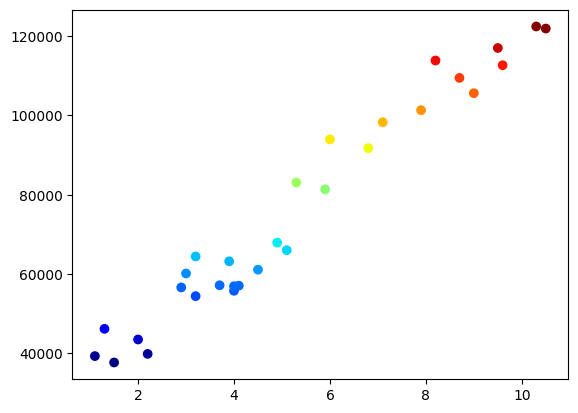

In [6]:
plt.scatter(data.iloc[:,0], data.iloc[:,1], c=data.iloc[:,1], cmap='jet')

plt.show()

In [7]:
X = data.iloc[:,0].to_numpy().reshape(-1, 1)
Y = data.iloc[:,1]

models = [('Linear', LinearRegression()),
          ('CART', DecisionTreeRegressor()),
          ('RF', RandomForestRegressor()),
          ('GBM', GradientBoostingRegressor()),
          ("XGBoost", XGBRegressor(objective='reg:squarederror')),
          ("LightGBM", LGBMRegressor())
        ]

for name, regressor in models:
    rmse = np.mean(np.sqrt(-cross_val_score(regressor, X, Y, cv=5, scoring="neg_mean_squared_error")))
    regressor.fit(X, Y)
    print(f"RMSE: {round(rmse, 4)} ({name})")

RMSE: 6527.7966 (Linear)
RMSE: 8948.7849 (CART)
RMSE: 9642.6912 (RF)
RMSE: 8883.5736 (GBM)
RMSE: 11640.6305 (XGBoost)
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 24, number of used features: 0
[LightGBM] [Info] Start training from score 84031.375000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves 

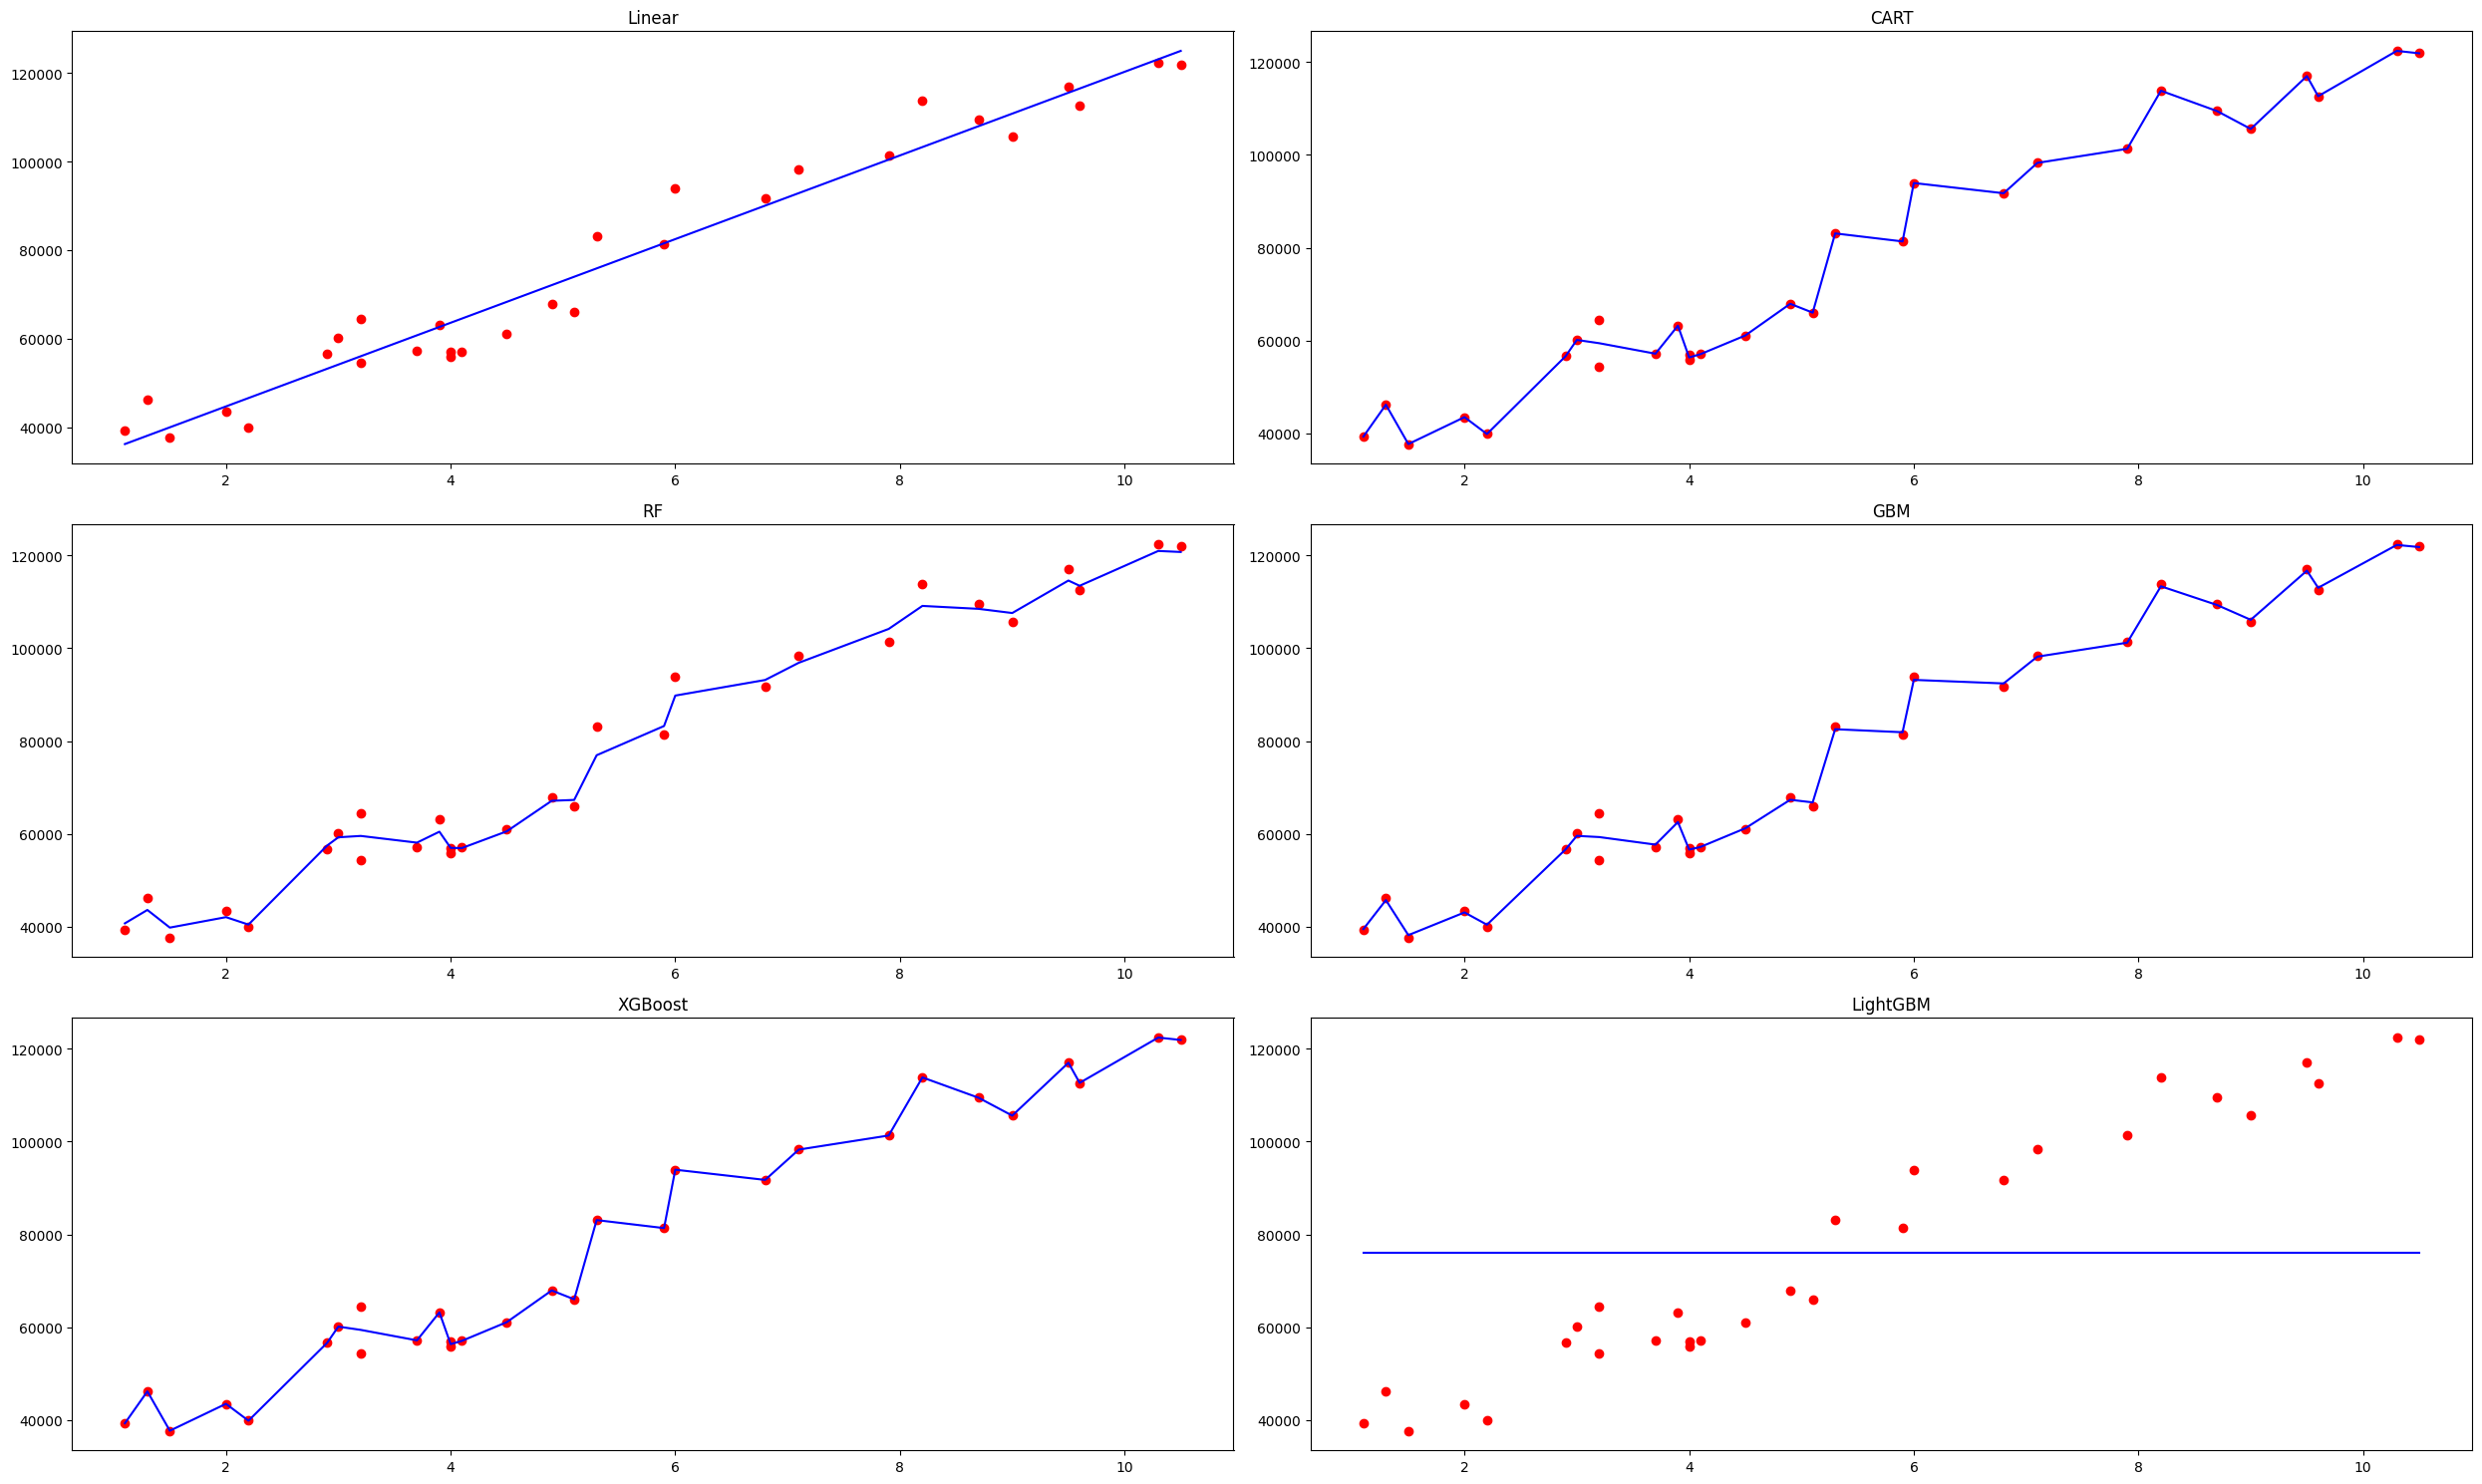

In [8]:
figure, axis = plt.subplots(3, 2, figsize=(25,15))
for i in range(3):
    for j in range(2):
        axis[i][j].scatter(X, Y, color='red',)
        axis[i][j].plot(X,models[i*2 + j][1].predict(X), color='blue')
        axis[i][j].set_title(models[i*2 + j][0])
plt.tight_layout()
plt.show()

In [9]:
models[1][1].predict(X)

array([ 39343. ,  46205. ,  37731. ,  43525. ,  39891. ,  56642. ,
        60150. ,  59445. ,  59445. ,  57189. ,  63218. ,  56375.5,
        56375.5,  57081. ,  61111. ,  67938. ,  66029. ,  83088. ,
        81363. ,  93940. ,  91738. ,  98273. , 101302. , 113812. ,
       109431. , 105582. , 116969. , 112635. , 122391. , 121872. ])